# Importing modules

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import graphviz
import pydotplus
import seaborn as sns
from IPython.display import Image
from scipy.stats import spearmanr
from scipy.cluster.vq import kmeans, vq
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Importing dataset

In [86]:
df = pd.read_csv('sample_data/metadata.csv')

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [88]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


# Preprocessing

In [89]:
# unnecessary field
df = df.drop(['Employee_ID'], axis=1)

In [90]:
#check for missing values and fill to remove nulls
df.fillna({'Physical_Activity': 'N/A'}, inplace=True)
df.fillna({'Mental_Health_Condition': 'N/A'}, inplace=True)


In [91]:
# check all columns for missing values
df.isnull().sum()
# delete na features
df.dropna(inplace=True)

In [92]:
# show unique values for columns to identify categorical attributes
for column in df.columns:
    print(f"Unique values in '{column}':\n", df[column].unique(), "\n")


Unique values in 'Age':
 [32 40 59 27 49 31 42 56 30 33 47 51 36 45 26 43 53 22 37 48 46 24 54 57
 35 60 25 50 28 23 38 29 58 55 41 44 34 52 39] 

Unique values in 'Gender':
 ['Non-binary' 'Female' 'Male' 'Prefer not to say'] 

Unique values in 'Job_Role':
 ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager'] 

Unique values in 'Industry':
 ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail'] 

Unique values in 'Years_of_Experience':
 [13  3 22 20 32 31 24  6  9 28 17  1  5 23 30 33 21 11 34  4 29 27 10 18
 14 26 12  7 25  8 15 35  2 19 16] 

Unique values in 'Work_Location':
 ['Hybrid' 'Remote' 'Onsite'] 

Unique values in 'Hours_Worked_Per_Week':
 [47 52 46 32 35 39 51 54 24 57 48 26 21 45 59 44 37 36 22 56 33 25 20 30
 29 58 53 23 42 28 31 55 49 43 27 38 60 50 34 41 40] 

Unique values in 'Number_of_Virtual_Meetings':
 [ 7  4 11  8 12  3  6 13  9  1 15 14 10  2  0  5] 

Unique values in 'Work_Life_Balance_Rating':


# Encoding and defining categorical and numeric values

In [93]:
# defining the categorical attrivutes to get them ready for encoding
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']
numeric_columns = [col for col in df.columns if col not in categorical_columns]

In [94]:
# mapping categorical values to numeric and storing mappings to dictionary
ordinal_encoder = preprocessing.OrdinalEncoder()

df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns]).astype(int)

mappings = {}
for i, column in enumerate(categorical_columns):
    mappings[column] = {category: int(code) for code, category in enumerate(ordinal_encoder.categories_[i])}

In [95]:
# prints dictionary of mappings to see what number has been set for each label
for column, mapping in mappings.items():
    print(f"Mapping for '{column}':\n", mapping, "\n")

Mapping for 'Gender':
 {'Female': 0, 'Male': 1, 'Non-binary': 2, 'Prefer not to say': 3} 

Mapping for 'Job_Role':
 {'Data Scientist': 0, 'Designer': 1, 'HR': 2, 'Marketing': 3, 'Project Manager': 4, 'Sales': 5, 'Software Engineer': 6} 

Mapping for 'Industry':
 {'Consulting': 0, 'Education': 1, 'Finance': 2, 'Healthcare': 3, 'IT': 4, 'Manufacturing': 5, 'Retail': 6} 

Mapping for 'Work_Location':
 {'Hybrid': 0, 'Onsite': 1, 'Remote': 2} 

Mapping for 'Stress_Level':
 {'High': 0, 'Low': 1, 'Medium': 2} 

Mapping for 'Access_to_Mental_Health_Resources':
 {'No': 0, 'Yes': 1} 

Mapping for 'Productivity_Change':
 {'Decrease': 0, 'Increase': 1, 'No Change': 2} 

Mapping for 'Satisfaction_with_Remote_Work':
 {'Neutral': 0, 'Satisfied': 1, 'Unsatisfied': 2} 

Mapping for 'Physical_Activity':
 {'Daily': 0, 'N/A': 1, 'Weekly': 2} 

Mapping for 'Sleep_Quality':
 {'Average': 0, 'Good': 1, 'Poor': 2} 

Mapping for 'Region':
 {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 

In [96]:
# replace encoded values with original categorical labels to use for plotting
df_plot = df.replace({
    'Job_Role': {0: 'Data Scientist', 1: 'Designer', 2: 'HR', 3: 'Marketing', 4: 'Project Manager', 5: 'Sales', 6: 'Software Engineer'},
    'Sleep_Quality': {0: 'Average', 1: 'Good', 2: 'Poor'},
    'Gender': {0: 'Female', 1: 'Male', 2: 'Non binary', 3: 'Prefer not to say'},
    'Industry': {0: 'Consulting', 1: 'Education', 2: 'Finance', 3: 'Healthcare', 4: 'IT', 5: 'Manufacturing', 6: 'Retail'},
    'Work_Location': {0: 'Hybrid', 1: 'Onsite', 2: 'Remote'},
    'Stress_Level': {0: 'High', 1: 'Low', 2: 'Medium'},
    'Access_to_Mental_Health_Resources': {0: 'No', 1: 'Yes'},
    'Productivity_Change': {0: 'Decrease', 1: 'Increase', 2: 'No Change'},
    'Satisfaction_with_Remote_Work': {0: 'Neutral', 1: 'Satisfied', 2: 'Unsatisfied'},
    'Physical_Activity': {0: 'Daily', 1: 'N/A', 2: 'Weekly'},
    'Region': {0: 'Africa', 1: 'Asia', 2: 'Europe', 3: 'North America', 4: 'Oceania', 5: 'South America'}
})

In [97]:
# one-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [98]:
plot_labels = {col: col.replace("_", " ").title() for col in df.columns}

# Defining target variables and splitting into test/train

In [99]:
# setting target variable
X = df.drop(['Mental_Health_Condition'], axis=1)
y = pd.get_dummies(df['Mental_Health_Condition'], dummy_na=False)

In [100]:
df_encoded.columns

Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Mental_Health_Condition', 'Social_Isolation_Rating',
       'Company_Support_for_Remote_Work', 'Gender_1', 'Gender_2', 'Gender_3',
       'Job_Role_1', 'Job_Role_2', 'Job_Role_3', 'Job_Role_4', 'Job_Role_5',
       'Job_Role_6', 'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4',
       'Industry_5', 'Industry_6', 'Work_Location_1', 'Work_Location_2',
       'Stress_Level_1', 'Stress_Level_2',
       'Access_to_Mental_Health_Resources_1', 'Productivity_Change_1',
       'Productivity_Change_2', 'Satisfaction_with_Remote_Work_1',
       'Satisfaction_with_Remote_Work_2', 'Physical_Activity_1',
       'Physical_Activity_2', 'Sleep_Quality_1', 'Sleep_Quality_2', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5'],
      dtype='object')

In [101]:
# initializing training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model

In [102]:
# testing best parameters for decision tree
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': np.arange(1, 10),
    'criterion': ['gini', 'entropy']
    }

dt_cv = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
dt_cv.fit(X_train, y_train)

best_params = dt_cv.best_params_
best_score = dt_cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy score: {best_score:0.4f}")

Best parameters: {'criterion': 'gini', 'max_depth': 9}
Best accuracy score: 0.0975


In [103]:
# initializing first model: decision tree
# using best params

dt0 = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=42)
dt0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [104]:
# test the decision tree on testing data
y_pred_dt = dt0.predict(X_test)

# report testing accuracy
print('Testing accuracy of this decision tree: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dt)))
print('Training accuracy of this decision tree: {0:0.4f}'. format(dt0.score(X_train, y_train)))

Testing accuracy of this decision tree: 0.1150
Training accuracy of this decision tree: 0.3000


In [105]:
# visualize tree
feature_names = [col for col in df if col != 'Mental_Health_Condition']
class_names = df_encoded['Mental_Health_Condition']

dot_data = tree.export_graphviz(dt0, out_file=None,
                                feature_names=feature_names,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                proportion=True,
                                node_ids=True,
                                impurity=True,
                                label='all')

graph = graphviz.Source(dot_data)


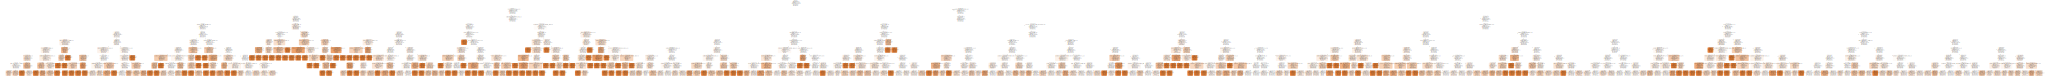

In [106]:
graph

In [107]:
graph.render('gini_tree')

'gini_tree.pdf'

In [108]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [109]:
graph.write_png('decision_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.574124 to fit



True

# Spearman's Rank Correlation

In [110]:
# initialize correlation matrix
corr_matrix, _ = spearmanr(X_train)

# set features to training columns
feature_importance = pd.DataFrame(corr_matrix, columns=X_train.columns, index=X_train.columns)

In [111]:
# playing with different color palettes
# rocket_r, icefire, coolwarm look the best (i think)
custom_palette = sns.color_palette("rocket_r", as_cmap=True)

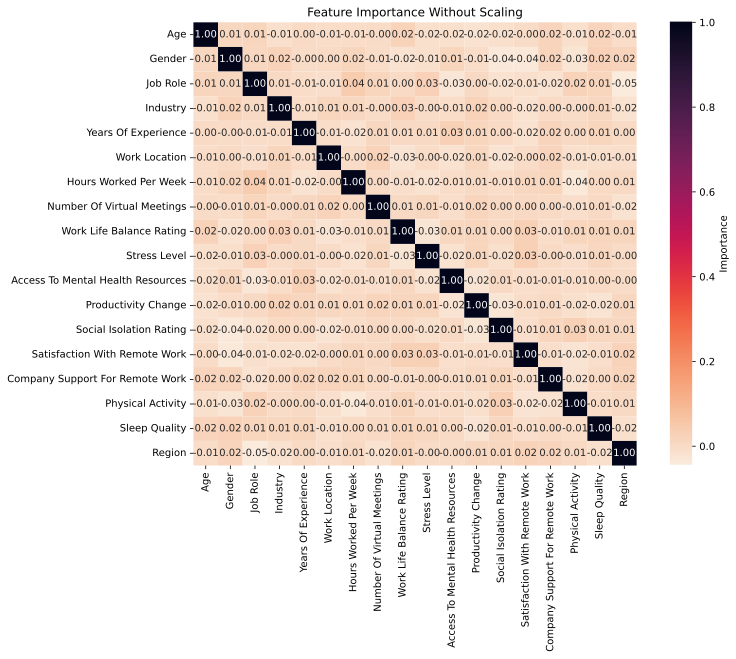

In [129]:
# visualize plot before scaling features
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance,
            annot=True,
            cmap=custom_palette,
            fmt=".2f",
            square=True,
            cbar_kws={'label': 'Importance'},
            xticklabels=[plot_labels[col] for col in feature_importance.columns],
            yticklabels=[plot_labels[idx] for idx in feature_importance.index])
plt.title("Feature Importance Without Scaling")
plt.savefig('heatmap_labeled_unscaled.png', bbox_inches='tight')
plt.show()

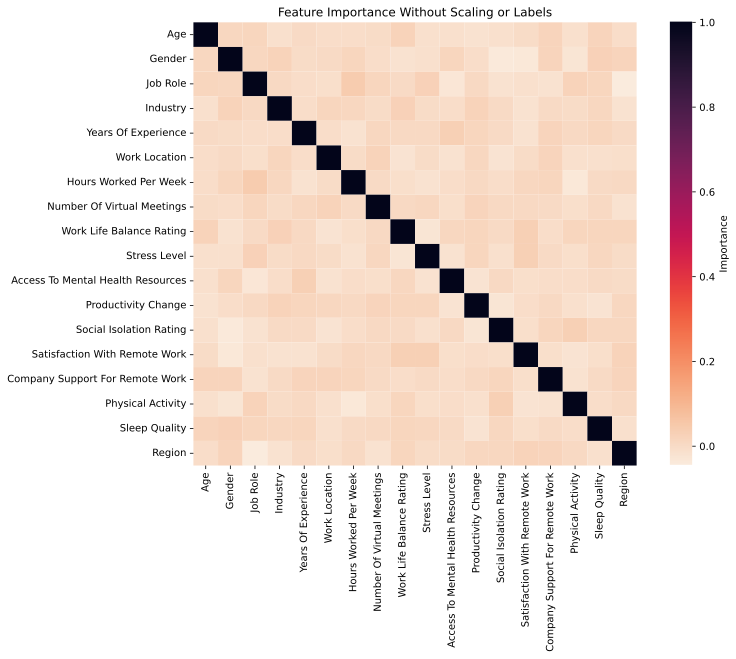

In [130]:
# saves plot with unlabled and unscaled atts
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance,
            annot=False,
            cmap=custom_palette,
            fmt=".2f",
            square=True,
            cbar_kws={'label': 'Importance'},
            xticklabels=[plot_labels[col] for col in feature_importance.columns],
            yticklabels=[plot_labels[idx] for idx in feature_importance.index])
plt.title("Feature Importance Without Scaling or Labels")
plt.savefig('heatmap_unlabeled_unscaled.png', bbox_inches='tight')
plt.show()

In [114]:
# copies features to be scaled
feature_importance_scaled = feature_importance.copy()

# self-referencing values set to 0 temporarily (e.g. 'Age' has very high (1) correlation with 'Age', we want to ignore the obvious)
np.fill_diagonal(feature_importance_scaled.values, 0)

In [115]:
# initialize scaler and scale interdependent variables to be between 0 and 0.99
scaler = MinMaxScaler(feature_range=(0, 0.99))
feature_importance_scaled = pd.DataFrame(scaler.fit_transform(feature_importance_scaled), columns=feature_importance.columns, index=feature_importance.index)

In [116]:
# reset self referencing values to 1
np.fill_diagonal(feature_importance_scaled.values, 1)

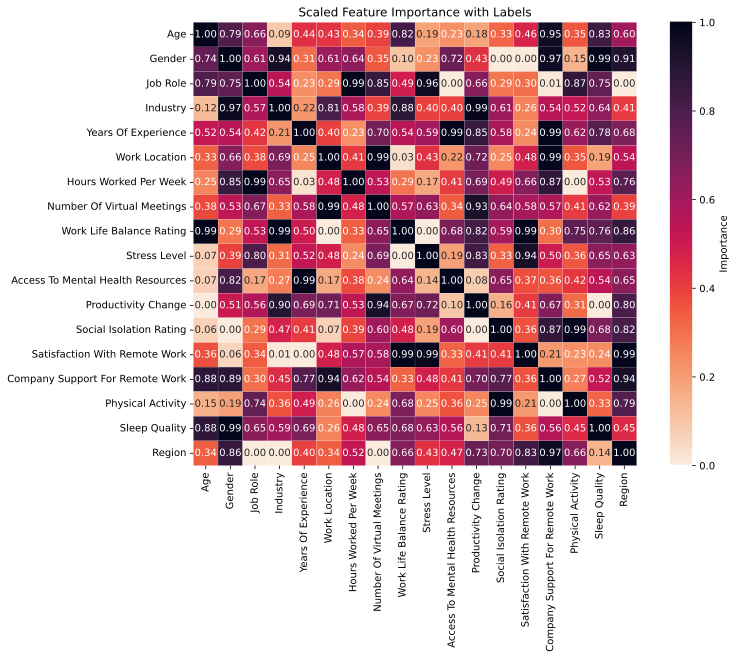

In [131]:
# plots heat map showing feature importance with scaled variables
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance_scaled,
            annot=True,
            cmap=custom_palette,
            fmt=".2f",
            square=True,
            cbar_kws={'label': 'Importance'},
            linecolor='white',
            linewidths=0.1,
            xticklabels=[plot_labels[col] for col in feature_importance.columns],
            yticklabels=[plot_labels[idx] for idx in feature_importance.index])
plt.title("Scaled Feature Importance with Labels")
plt.savefig('heatmap_labeled.png', bbox_inches='tight')
plt.show()

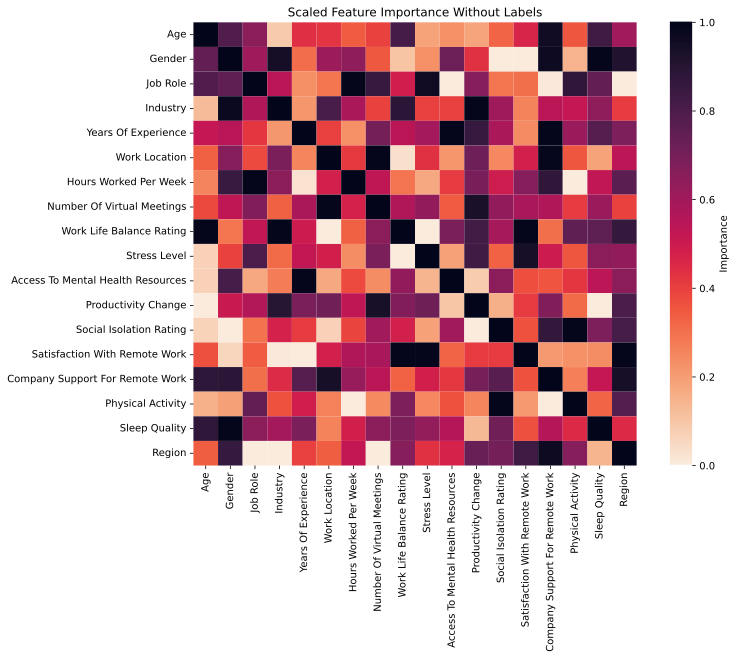

In [132]:
# heat map with no values or gridlines
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance_scaled,
            annot=False,
            cmap=custom_palette,
            fmt=".2f",
            square=True,
            cbar_kws={'label': 'Importance'},
            xticklabels=[plot_labels[col] for col in feature_importance.columns],
            yticklabels=[plot_labels[idx] for idx in feature_importance.index])
plt.title("Scaled Feature Importance Without Labels")
plt.savefig('heatmap_unlabeled.png', bbox_inches='tight')
plt.show()

## Formulas based on heat map

In [173]:
# calculates gender for each industry
gender_industry_counts = df.groupby('Industry')['Gender'].value_counts(normalize=True).unstack() * 100
gender_industry_counts.columns = [f"{col} (%)" for col in gender_industry_counts.columns]
print(gender_industry_counts)

              0 (%)      1 (%)      2 (%)      3 (%)
Industry                                            
0         26.617647  26.029412  23.088235  24.264706
1         25.652174  27.246377  23.043478  24.057971
2         27.309237  25.033467  21.686747  25.970549
3         24.313187  24.450549  27.060440  24.175824
4         24.128686  26.541555  23.190349  26.139410
5         25.768668  21.961933  27.964861  24.304539
6         24.655647  26.446281  24.104683  24.793388


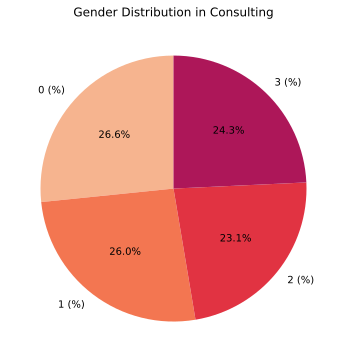

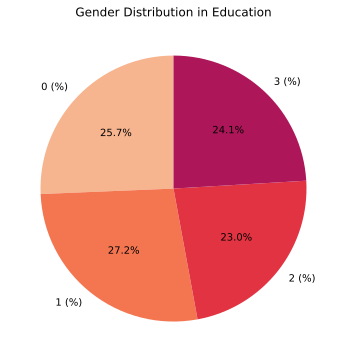

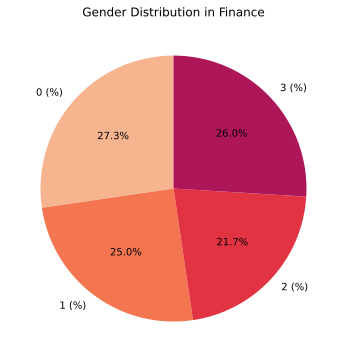

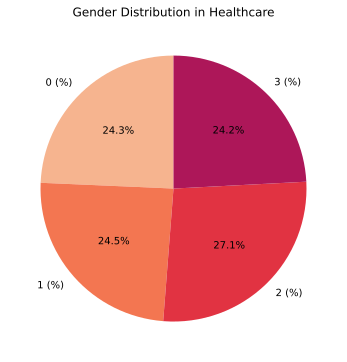

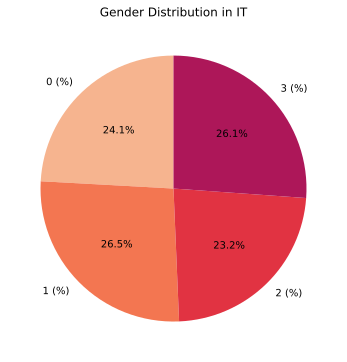

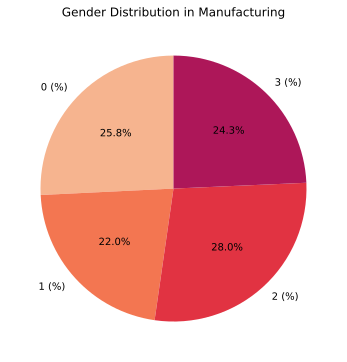

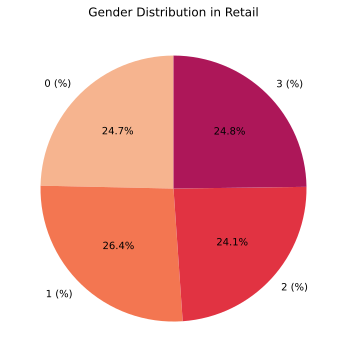

In [174]:
gender_mapping = {0: 'Female', 1: 'Male', 2: 'Non-binary', 3: 'Prefer not to say'}
industry_mapping = {0: 'Consulting', 1: 'Education', 2: 'Finance', 3: 'Healthcare', 4: 'IT', 5: 'Manufacturing', 6: 'Retail'}

gender_industry_counts.index = gender_industry_counts.index.map(industry_mapping)

for industry in gender_industry_counts.index:
    proportions = gender_industry_counts.loc[industry]
    labels = proportions.index
    plt.figure(figsize=(8, 6))
    plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket_r'))
    plt.title(f"Gender Distribution in {industry}")
    plt.show()

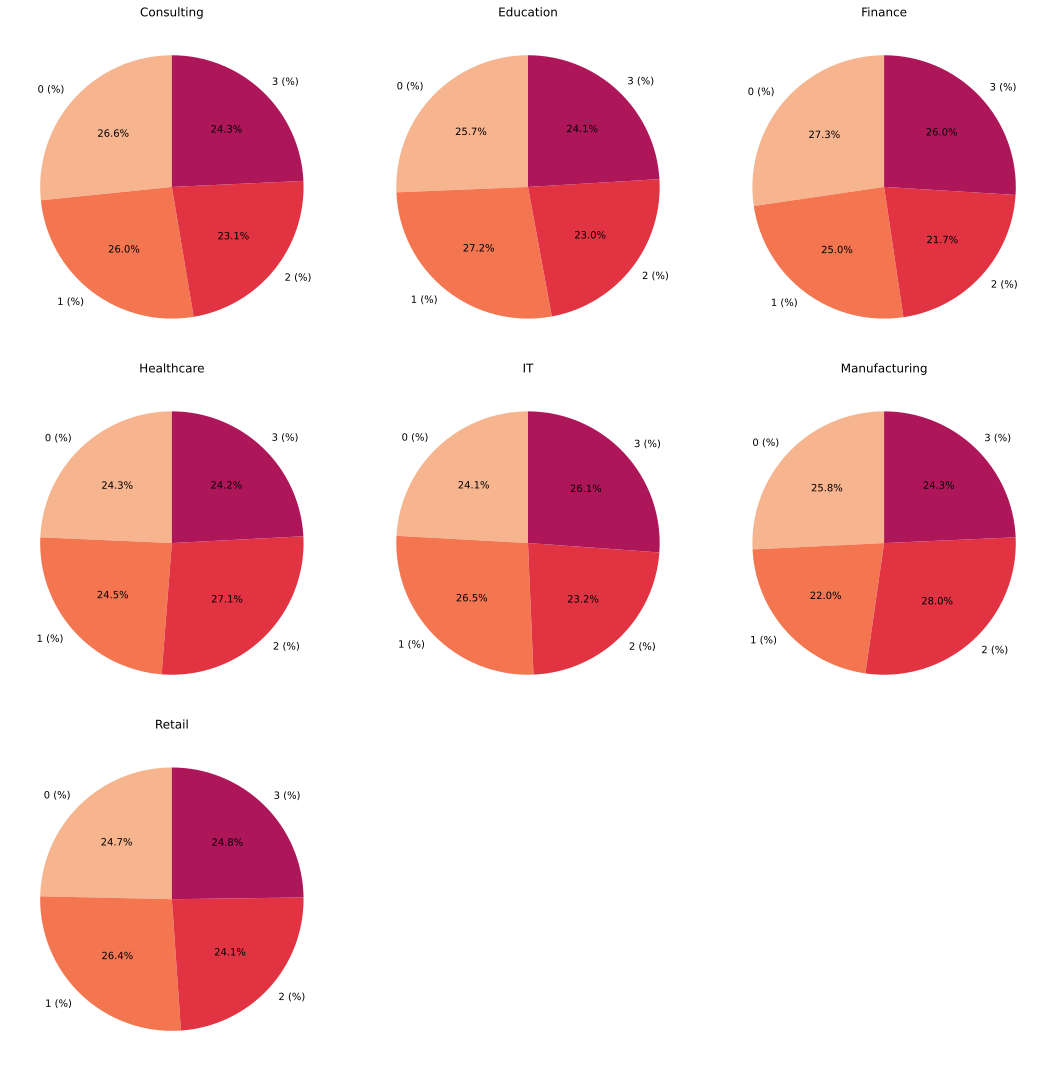

In [153]:
num_charts = len(gender_industry_counts.index)
cols = 3
rows = (num_charts + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, industry in enumerate(gender_industry_counts.index):
    ax = axes[i]
    ax.pie(gender_industry_counts.loc[industry],
           labels=gender_industry_counts.columns,
           autopct='%1.1f%%',
           startangle=90,
           colors=sns.color_palette('rocket_r'))
    ax.set_title(f"{industry}")

for ax in axes[num_charts:]:
    ax.axis('off')

plt.tight_layout()
plt.savefig("combined_pie_charts.png", bbox_inches='tight')
plt.show()


# Neural Network

In [36]:
# making new splits with unencoded variables
X_nn = df_plot.drop(['Mental_Health_Condition'], axis=1)
y_nn = df_plot['Mental_Health_Condition']

In [37]:
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [38]:
#initializing NN model
model = Sequential([
        Dense(128, activation='sigmoid'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# compiling NN model
model.compile(optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=200, batch_size=50, validation_split=0.2)

Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2370 - loss: 1.3979 - val_accuracy: 0.2362 - val_loss: 1.3883
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.3866 - val_accuracy: 0.2250 - val_loss: 1.3879
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2518 - loss: 1.3854 - val_accuracy: 0.2412 - val_loss: 1.3878
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2604 - loss: 1.3866 - val_accuracy: 0.2500 - val_loss: 1.3895
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2715 - loss: 1.3865 - val_accuracy: 0.2300 - val_loss: 1.3908
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2702 - loss: 1.3850 - val_accuracy: 0.2400 - val_loss: 1.3906
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2767 - loss: 1.3840 - val_accuracy: 0.2450 - val_loss: 1.3910
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2662 - loss: 1.3834 - val_accuracy: 0.2225 - v

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print ("testing accuracy is: %.2f"%(accuracy*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.4249  
testing accuracy is: 25.10


In [160]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    colors = sns.color_palette("rocket_r", 2)
    plt.plot(epochs, train_metrics, color=colors[0])
    plt.plot(epochs, val_metrics, color=colors[1])
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.savefig('train_val_acc.png')
    plt.show()

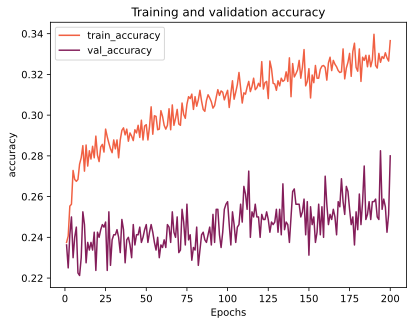

In [163]:
plot_metric(history, 'accuracy')

# Other Plots

<ipython-input-180-89ee24b188cc>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.histplot(data=df_plot, x='Job_Role', hue='Sleep_Quality', multiple="stack", shrink=0.8, palette=sns.color_palette("rocket_r", as_cmap=False))


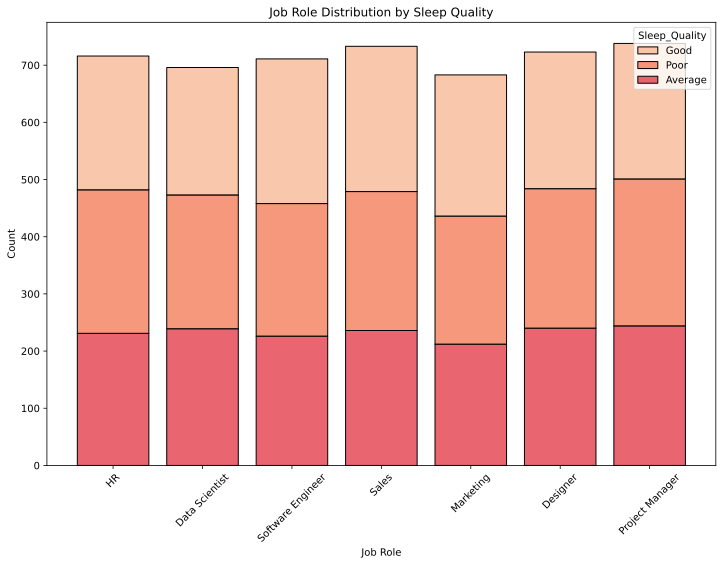

In [180]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_plot, x='Job_Role', hue='Sleep_Quality', multiple="stack", shrink=0.8, palette=sns.color_palette("rocket_r", as_cmap=False))
plt.title("Job Role Distribution by Sleep Quality")
plt.xlabel("Job Role")
plt.xticks(rotation=45)
plt.savefig('job_by_sleep.png', bbox_inches='tight')
plt.show()

<Figure size 1200x800 with 0 Axes>

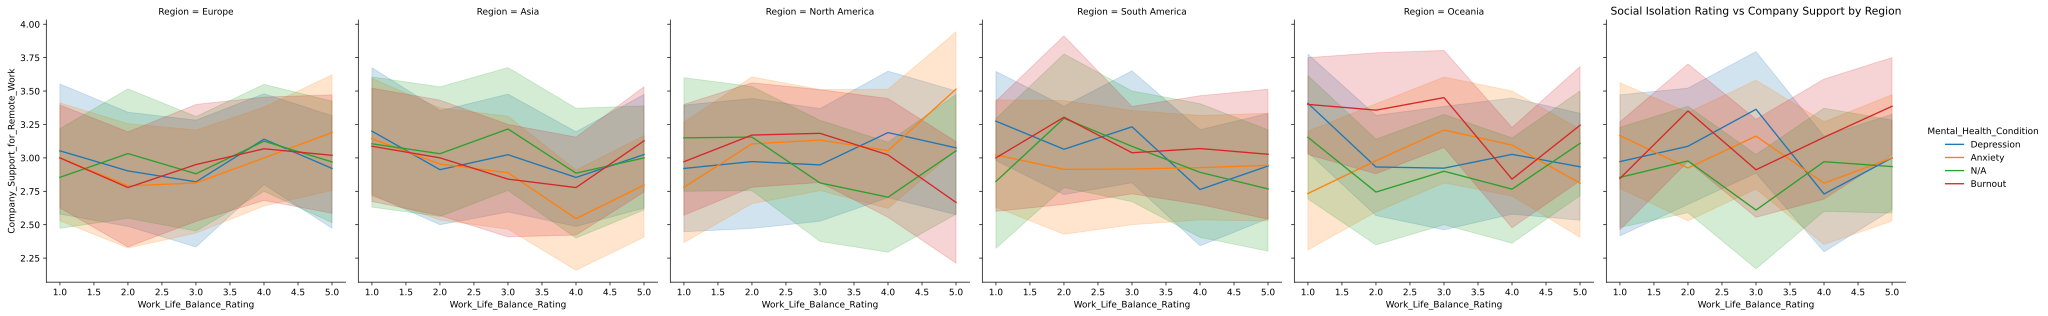

In [44]:
plt.figure(figsize=(12, 8))
sns.relplot(data=df_plot, kind="line",
            x='Work_Life_Balance_Rating', y='Company_Support_for_Remote_Work', col="Region",
            hue='Mental_Health_Condition')
plt.title("Social Isolation Rating vs Company Support by Region")
plt.show()


<Figure size 1200x800 with 0 Axes>

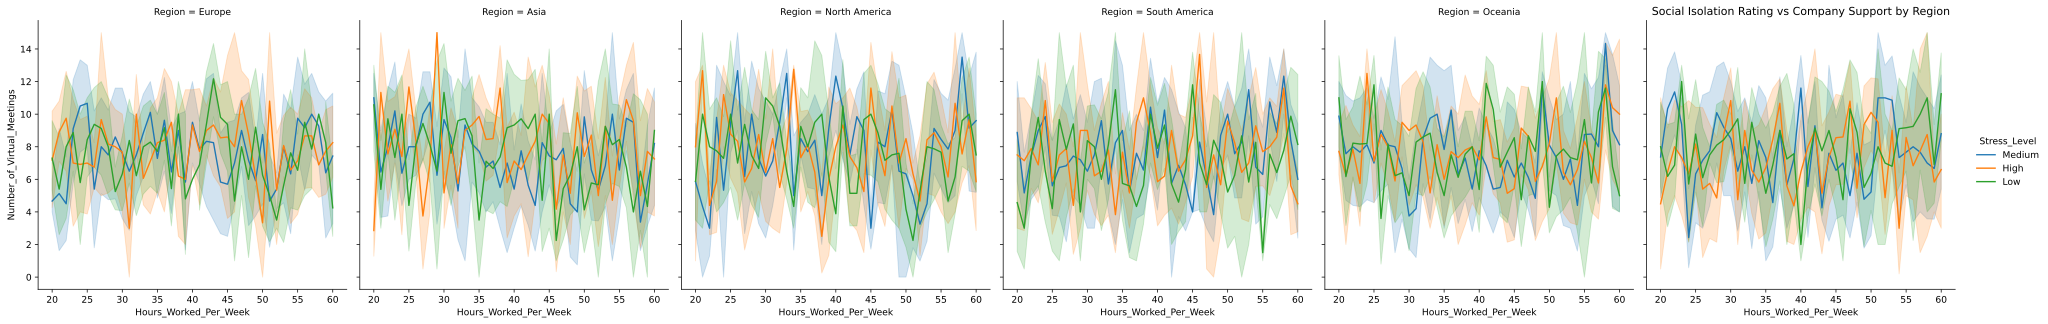

In [45]:
plt.figure(figsize=(12, 8))
sns.relplot(data=df_plot, kind="line",
            x='Hours_Worked_Per_Week', y='Number_of_Virtual_Meetings', col="Region",
            hue='Stress_Level')
plt.title("Social Isolation Rating vs Company Support by Region")
plt.show()


<Figure size 1200x800 with 0 Axes>

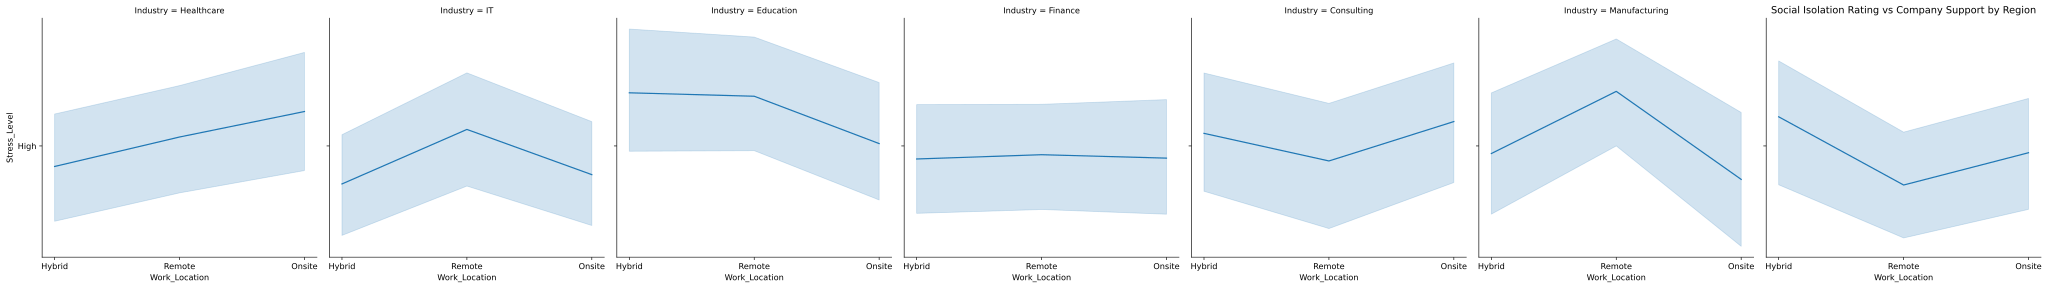

In [46]:
plt.figure(figsize=(12, 8))
sns.relplot(data=df_plot, kind="line",
            x='Work_Location', y='Stress_Level', col="Industry")
plt.title("Social Isolation Rating vs Company Support by Region")
plt.show()

In [47]:
for i, column in enumerate(numeric_columns):
    print(f"{column}\n")

Age

Years_of_Experience

Hours_Worked_Per_Week

Number_of_Virtual_Meetings

Work_Life_Balance_Rating

Mental_Health_Condition

Social_Isolation_Rating

Company_Support_for_Remote_Work



In [48]:
for i, column in enumerate(categorical_columns):
    print(f"{column}\n")

Gender

Job_Role

Industry

Work_Location

Stress_Level

Access_to_Mental_Health_Resources

Productivity_Change

Satisfaction_with_Remote_Work

Physical_Activity

Sleep_Quality

Region

